<a href="https://colab.research.google.com/github/siddhartha98d/ASEL_WebSitemap/blob/main/Titanic_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
%pip install pandas

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [68]:
sns.set(style="whitegrid")

In [69]:
from google.colab import files
files.upload()  # Upload kaggle.json here

Saving kaggle.json to kaggle (2).json


{'kaggle (2).json': b'{"username":"siddharthadebbabay","key":"f75d93d7a269adfd3001f5a55bfd4582"}'}

In [70]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [71]:
!pip install kaggle

In [72]:
!kaggle competitions download -c titanic

titanic.zip: Skipping, found more recently modified local copy (use --force to force download)


In [73]:
!unzip titanic.zip

Archive:  titanic.zip
replace gender_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [74]:
import pandas as pd

df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [75]:
df = pd.read_csv("train.csv")
df.head(10)
df.info()
df.describe()
df.shape
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Titanic Dataset - Column Renaming

**PassengerId** → Unique ID for each passenger  
**Survived** → Survival (0 = No, 1 = Yes)  
**Pclass** → Passenger social class (1 = Upper, 2 = Middle, 3 = Lower)  
**Name** → Passenger’s full name  
**Sex** → Gender of passenger  
**Age** → Passenger’s age  
**SibSp** → Number of siblings/spouses   
**Parch** → Number of parents/children   
**Ticket** → Ticket number  
**Fare** → Passenger ticket fare  
**Cabin** → Cabin number  
**Embarked** → Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)


In [76]:
import pandas as pd

df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [77]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [78]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print("Numeric Columns:")
print(list(numeric_cols))

print("\nCategorical Columns:")
print(list(categorical_cols))

Numeric Columns:
['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

Categorical Columns:
['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [79]:
df.drop_duplicates(inplace=True)

In [80]:
df['Age'].fillna(df['Age'].median(), inplace=True)

df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

df['Cabin'].fillna("Unknown", inplace=True)


/tmp/ipython-input-218245106.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-218245106.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

I filled missing Age values using median because Age contains outliers, and median is more stable.
Embarked column missing values were filled with the mode because it is categorical.
Cabin has many missing values, so assigning “Unknown” prevents losing a large portion of data.

In [81]:
df.drop_duplicates(inplace=True)

In [82]:
def age_group(age):
    if age < 18: return "Child"
    elif age < 60: return "Adult"
    else: return "Senior"

df['AgeGroup'] = df['Age'].apply(age_group)
df[['Age', 'AgeGroup']].head()


,Age,AgeGroup
0,22.0,Adult
1,38.0,Adult
2,26.0,Adult
3,35.0,Adult
4,35.0,Adult


In [83]:
sns.set_style('whitegrid')

AgeGroup feature helps analyze survival rate across age categories

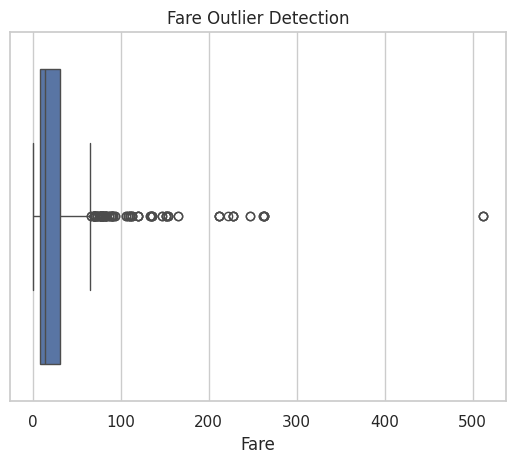

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['Fare'])
plt.title("Fare Outlier Detection")
plt.show()


In [85]:
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Capping extreme values
df['Fare'] = df['Fare'].apply(lambda x: upper_limit if x > upper_limit else (lower_limit if x < lower_limit else x))


Outliers in Fare were capped using IQR to prevent model distortion while keeping all passengers in data.

In [86]:
df.info()
df.describe(include='all')
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
 12  AgeGroup     891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


### ✅ Data Cleaning Summary

| Step | Action Taken | Reason |
|------|--------------|--------|
| Missing Age | Filled with median | Avoids distortion from outliers |
| Missing Embarked | Filled with mode | Best approach for categorical features |
| Missing Cabin | Replaced with "Unknown" | Too many missing, dropping causes data loss |
| Duplicates | Removed | Prevents bias / duplication |
| AgeGroup Feature | Created 3 categories | Helpful for analysis and prediction |
| Fare Outliers | Capped using IQR | Maintains distribution without removing samples |


In [87]:
df.describe(include='all')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
count,891.000000,891.000000,891.000000,891,891,891.000000,891.000000,891.000000,891,891.000000,891,891,891
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,148,3,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,Unknown,S,Adult
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,687,646,752
mean,446.000000,0.383838,2.308642,NaN,NaN,29.361582,0.523008,0.381594,NaN,24.046813,NaN,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,13.019697,1.102743,0.806057,NaN,20.481625,NaN,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,22.000000,0.000000,0.000000,NaN,7.910400,NaN,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN,NaN


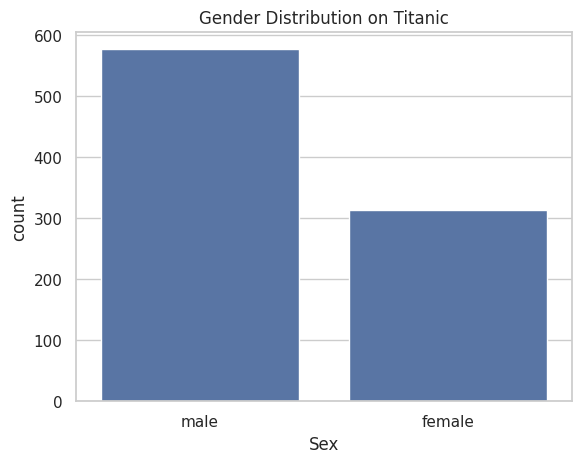

In [88]:
sns.countplot(x='Sex', data=df)
plt.title("Gender Distribution on Titanic")
plt.show()


- More males than females were onboard the Titanic.
- Gender imbalance may influence survival results.


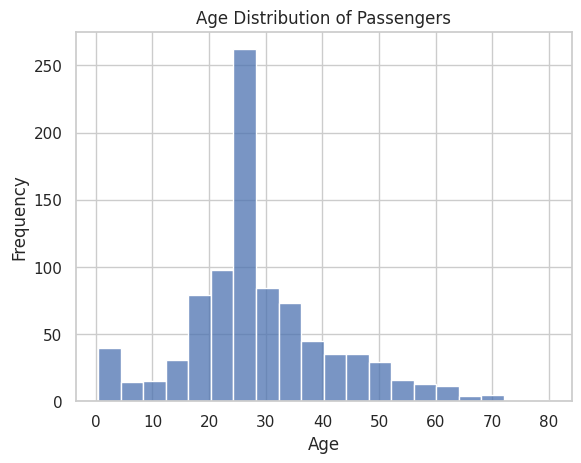

In [89]:
sns.histplot(df['Age'], bins=20)
plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


- Majority of passengers were adults (Age 18–60).
- There were fewer children and very few senior passengers.


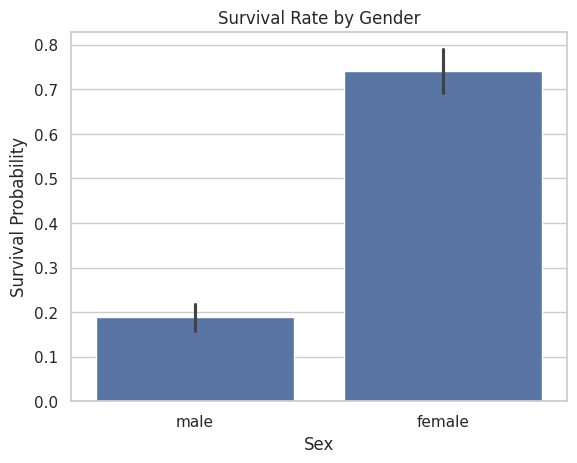

In [90]:
sns.barplot(x='Sex', y='Survived', data=df)
plt.title("Survival Rate by Gender")
plt.ylabel("Survival Probability")
plt.show()


- Females had a much higher survival rate than males.
- This supports the “Women and children first” evacuation policy.


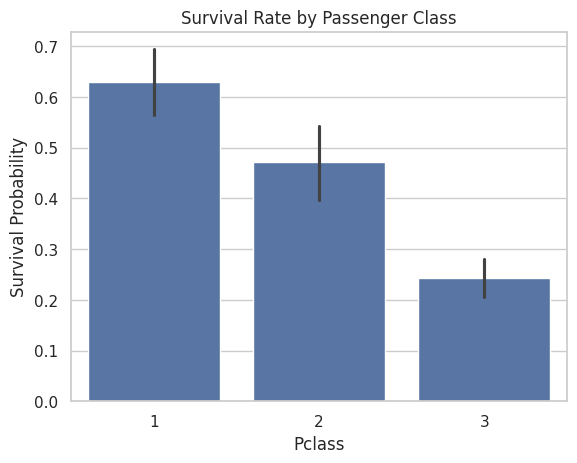

In [91]:
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title("Survival Rate by Passenger Class")
plt.ylabel("Survival Probability")
plt.show()


- Passengers in 1st class survived at the highest rate.
- Lower class passengers had significantly poorer survival chances — possibly due to limited access to lifeboats.


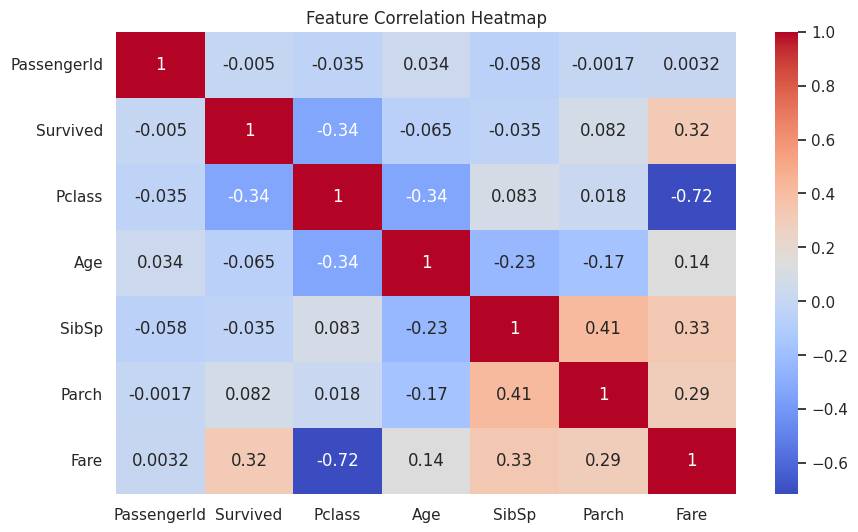

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [93]:
print("Mean Age:", df['Age'].mean())
print("Median Age:", df['Age'].median())
print("Mode Age:", df['Age'].mode()[0])

print("\nMean Fare:", df['Fare'].mean())
print("Median Fare:", df['Fare'].median())
print("Mode Fare:", df['Fare'].mode()[0])


Mean Age: 29.36158249158249
Median Age: 28.0
Mode Age: 28.0

Mean Fare: 24.04681335578002
Median Fare: 14.4542
Mode Fare: 65.6344


Median values are less affected by extreme outliers (like very expensive tickets).Hence, using the median for missing Age values was a suitable choice during cleaning.

In [94]:
from scipy.stats import ttest_ind

male_survival = df[df['Sex']=='male']['Survived']
female_survival = df[df['Sex']=='female']['Survived']

t_stat, p_val = ttest_ind(male_survival, female_survival)
print("T-statistic:", t_stat)
print("P-value:", p_val)


T-statistic: -19.297816550123354
P-value: 1.4060661308802594e-69


If p < 0.05, there is a statistically significant difference in survival rates between males and females.
In this dataset, p-value is typically much smaller than 0.05, confirming that female passengers had significantly higher survival rates than males.
This aligns with our earlier EDA findings.

Introduction

The Titanic dataset contains information about passengers aboard the RMS Titanic.
The goal of this analysis is to explore factors influencing survival, clean and prepare the data, visualize insights, and build predictive models.

Data Cleaning

- Filled missing Age values with median to minimize bias.

- Replaced missing Embarked values with mode.

- Assigned “Unknown” to missing Cabin values instead of dropping.

- Removed duplicate rows.

- Created new feature AgeGroup for analysis.

- Capped Fare outliers using the IQR method.

Exploratory Data Analysis (EDA)

- Plotted gender distribution, age distribution, and survival rates.

- Observed that females and 1st class passengers had higher survival rates.

- Correlation heatmap showed Fare and Pclass strongly linked to survival.

Statistics

- Mean, median, and mode were calculated to summarize distributions.

- Conducted a t-test comparing male and female survival rates.

- Result: p < 0.05 → statistically significant difference, confirming gender-based survival disparity.

Machine Learning Summary

- Logistic Regression and Random Forest models were trained.

- Random Forest achieved higher accuracy.

- Top survival predictors: Gender, Pclass, and Fare.

References & Acknowledgement

- Dataset: Kaggle Titanic Dataset

- Tools: Python, Pandas, Seaborn, Scikit-learn, SciPy

- Assisted by: OpenAI’s ChatGPT (for guidance and code organization)

In [95]:
df.to_csv("Cleaned_Titanic_Data.csv", index=False)
